In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import pickle 

In [3]:
print('Hi')

Hi


/home/nicholas/miniconda3/envs/ox/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/nicholas/miniconda3/envs/ox/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/nicholas/miniconda3/envs/ox/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/nicholas/miniconda3/envs/ox/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarn

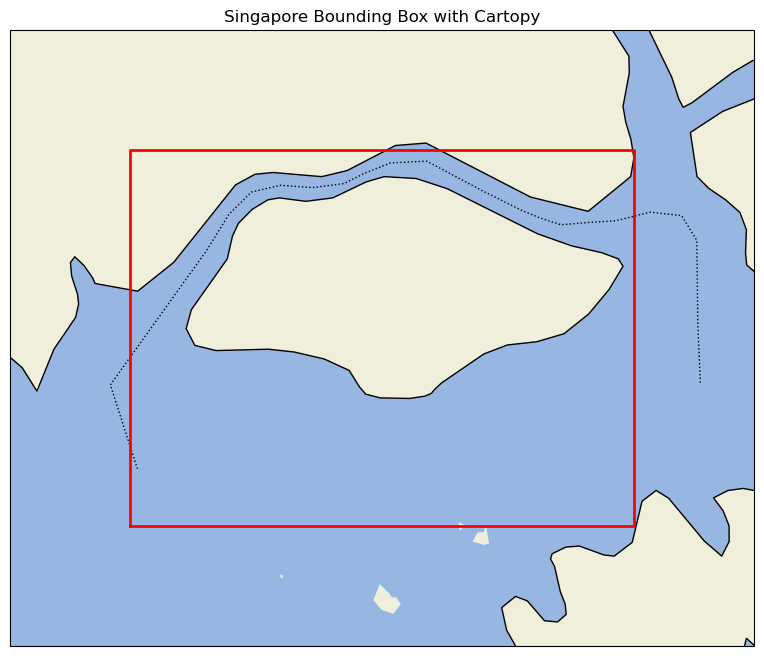

In [47]:
sw = (103.5940, 1.1586)  # (lon, lat)
ne = (104.0125, 1.4705)   # (lon, lat)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot bounding box
ax.plot(
    [sw[0], ne[0], ne[0], sw[0], sw[0]],
    [sw[1], sw[1], ne[1], ne[1], sw[1]],
    color='red',
    linewidth=2,
    transform=ccrs.PlateCarree()
)

ax.set_extent([sw[0]-0.1, ne[0]+0.1, sw[1]-0.1, ne[1]+0.1])
plt.title('Singapore Bounding Box with Cartopy')
plt.show()

In [ ]:
sw = (103.5940, 1.1586)  # (lon, lat)
ne = (104.0125, 1.4705)   # (lon, lat)
bbox (tuple[1.1586, float, float, float]) – Bounding box as (left, bottom, right, top). 

# Do not run unless you wanna regenerate the graph

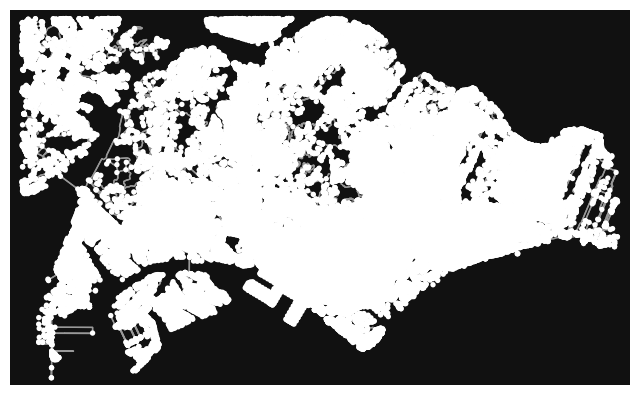

In [ ]:
# %%script false
# # download/model a street network for some city then visualize it
# # address = "Woodlands, Northwest, Singapore"
# # dist = 10000 #m
# # dist_type='bbox'
# sw = (103.5940, 1.1586)  # (lon, lat)
# ne = (104.0125, 1.4705)   # (lon, lat)

# # Convert to (left, bottom, right, top)
# bbox = (sw[0], sw[1], ne[0], ne[1])
# # Result: (103.5940, 1.1586, 104.0125, 1.4705)

# G = ox.graph.graph_from_bbox(bbox, network_type='all')
# fig, ax = ox.plot.plot_graph(G)
# # Sve to pickle
# graph_path = "data/SG_nodes.pkl"

# with open(graph_path, 'wb') as f:
#     pickle.dump(G, f)


In [ ]:
graph_path = "data/SG_nodes.pkl"

# Load graph
with open(graph_path, 'rb') as f:  # notice the r instead of w
    G_loaded = pickle.load(f)

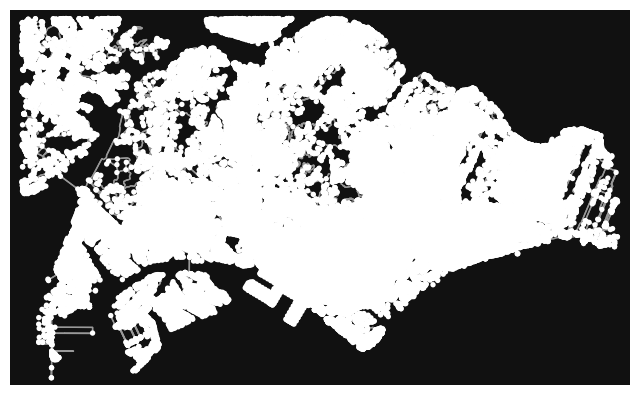

In [58]:
fig, ax = ox.plot.plot_graph(G_loaded)

In [43]:
# get a fully bidirection network (as a MultiDiGraph)
ox.settings.bidirectional_network_types += "drive"
G = ox.graph.graph_from_address(address, dist)

# convert your MultiDiGraph to an undirected MultiGraph
M = ox.convert.to_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.convert.to_digraph(G)



KeyboardInterrupt: 

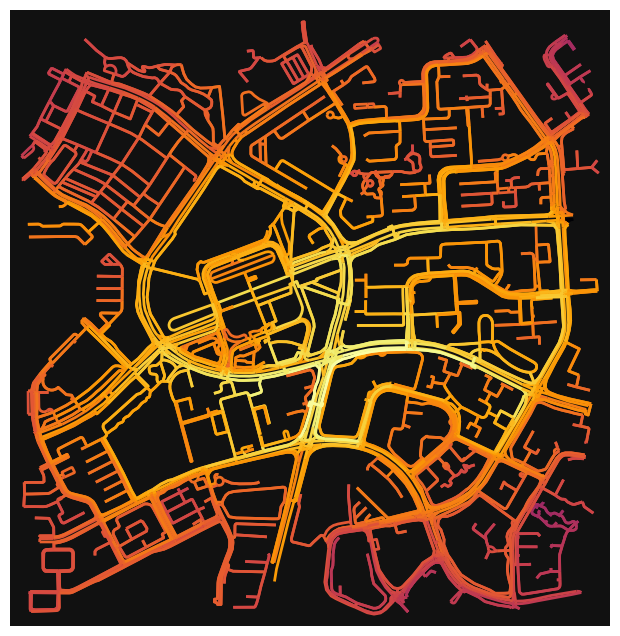

In [34]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")


# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)



# Routing

In [35]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

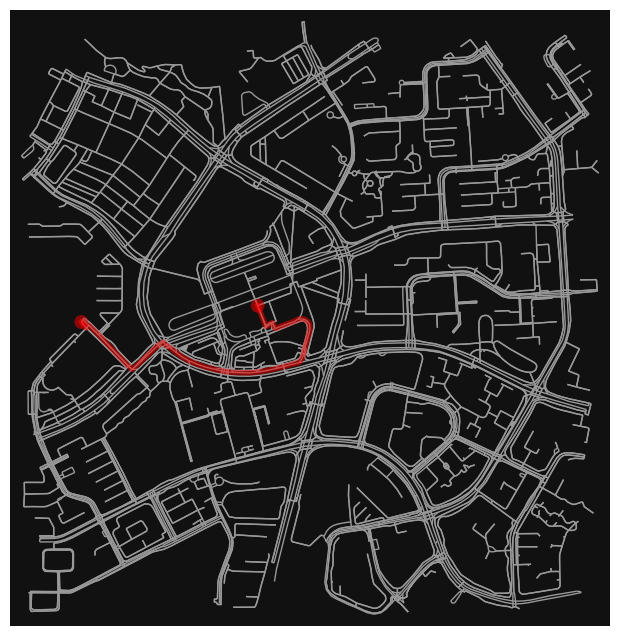

In [ ]:
loc1 = (1.44633, 103.78061)
loc2 = (1.43608, 103.78601)
loc3=

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=loc1[1], Y=loc2[0])
dest = ox.distance.nearest_nodes(G, X=loc2[1], Y=loc2[0])


# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)




In [41]:
G.nodes()

NodeView((244322158, 244322159, 244324715, 244325341, 244374999, 244382898, 244492338, 244492343, 244495335, 244495345, 244495374, 244495380, 244495382, 244495499, 244495514, 244495524, 244495526, 244495528, 1110331522, 1110331523, 1110331526, 1110331529, 1110331685, 1110331710, 1110331722, 1110331725, 1110331828, 1110671792, 1110671796, 1110671799, 1110671800, 1110671803, 1110671818, 1110671821, 1110671863, 1110671872, 1110671883, 1110671895, 1110671897, 1110671899, 1110671902, 1110671905, 1110671907, 1110671910, 1110671911, 1110671912, 1110671913, 1110671914, 1110671915, 1110671924, 1110671925, 1110671928, 1110671935, 1110671938, 1110671940, 1110671957, 1110671958, 1110672313, 1110672343, 1110672350, 1110672452, 1110672455, 1110672507, 1110672508, 1110672509, 1110900168, 1110900187, 1110900424, 1110929509, 1110929510, 1110929516, 1110929522, 1110929539, 1110929546, 1110929550, 1110929552, 1110929573, 1110929574, 1110929586, 1110929591, 1110929595, 1110929597, 1110929613, 1110929630, 

In [ ]:
# how long is our route in meters?
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))


1299

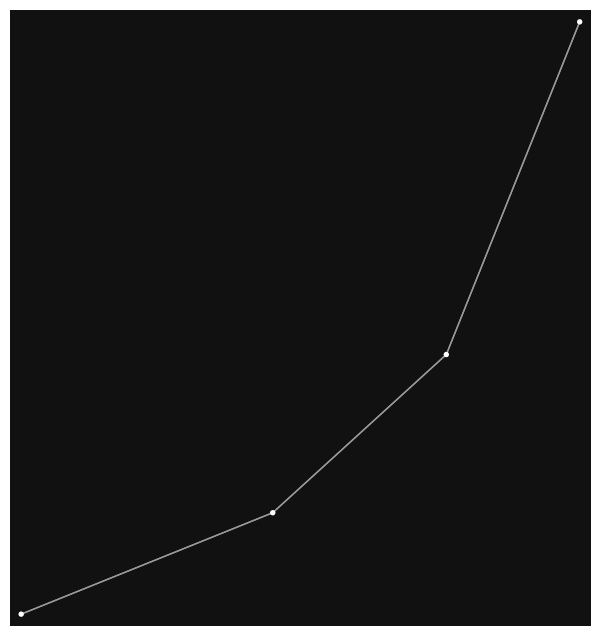

In [19]:
# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("Woodlands, Singapore", network_type="all")
fig, ax = ox.plot.plot_graph(G)